<a href="https://colab.research.google.com/github/MonseMoreno/ArteDeLaAnalitica/blob/main/08_2_actividad_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Regresión Lineal


* **Nombre:** Monserrat Karime Moreno Casas
* **Matrícula:** A01276775

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [59]:
# Carga las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression


In [4]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv('presion.csv')
df.head(6)


,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

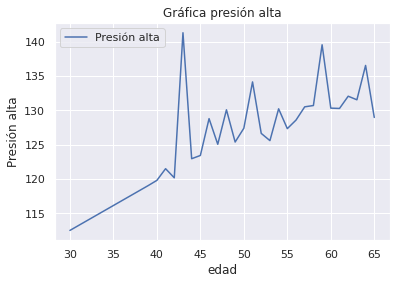

In [79]:
# Grafica la información de la edad y presión alta

x = df['Age']
y = df['Average of ap_hi']

# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Agregamos la gráfica
plt.plot(x, y, color='b', label='Presión alta')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('edad')
plt.ylabel('Presión alta')
plt.title('Gráfica presión alta')

# Cuando tenemos una sola línea, legend no hace mucho sentido.
plt.legend(loc='best')

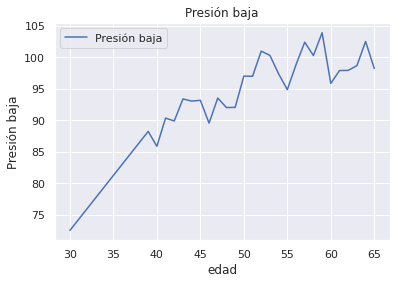

In [77]:
# Grafica la información de la edad y presión baja

x1 =   df['Age']
y1 = df['Average of ap_lo']

# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Agregamos la gráfica
plt.plot(x1, y1, color='b', label='Presión baja')

# Agregamos títulos a los ejes y al gráfico
plt.xlabel('edad')
plt.ylabel('Presión baja')
plt.title('Gráfica presión baja')

# Cuando tenemos una sola línea, legend no hace mucho sentido.
plt.legend(loc='best')

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

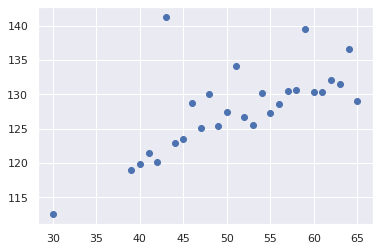

In [80]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
x = df['Age']
y = df['Average of ap_hi']
plt.scatter(x, y);


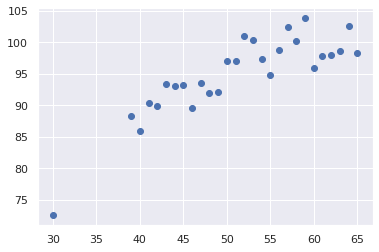

In [81]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?

x1 = df['Age']
y1 = df['Average of ap_lo']
plt.scatter(x1, y1);


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


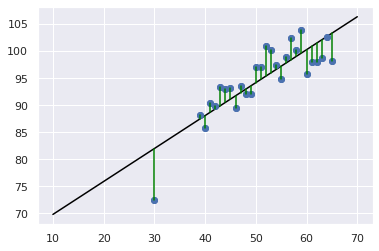

In [82]:
# Presión alta
model = LinearRegression(fit_intercept=True)

model.fit(x1[:, np.newaxis], y1)

xfit = np.linspace(10, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x1, y1)
plt.plot(xfit, yfit, color="black");
plt.plot(x1, y1, 'o')
plt.plot(np.vstack([x1,x1]), np.vstack([y1, model.predict(x1[:, np.newaxis])]), color="green");




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


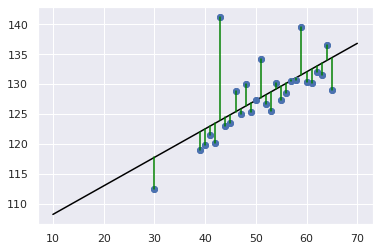

In [83]:
# Presión baja
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(10, 70, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x, y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");



¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [119]:
def pressure_low(age):

  dfAux = df.drop('Average of ap_hi', axis=1)
  df2 =  dfAux.where(df.Age == age)
  return  df2.dropna()  

query_age = 55
pressure_low(query_age)

,Age,Average of ap_lo
17,55.0,94.866489


In [117]:
def pressure_high(age):
  dfAux = df.drop('Average of ap_lo', axis=1)
  df2 =  dfAux.where(df.Age == age)
  return  df2.dropna()  

query_age= 30
pressure_high(query_age)

,Age,Average of ap_hi
0,30.0,112.5
